# Wine Point Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

Load and checkout the data from the dataset

In [2]:
df = pd.read_csv('../data/winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


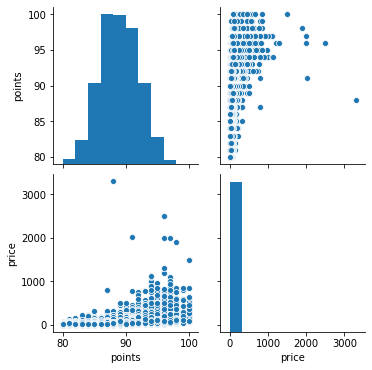

In [4]:
sns.pairplot(df)

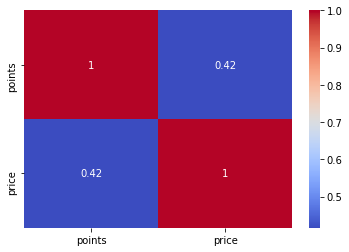

In [5]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

## Prepare Data

In [6]:
# As we don't need to know anything about the taster
# then we can remove `taster_name` and `taster_twitter_handle` from the data.
df = df.drop(["taster_name", "taster_twitter_handle"], axis=1)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   designation  92506 non-null   object 
 3   points       129971 non-null  int64  
 4   price        120975 non-null  float64
 5   province     129908 non-null  object 
 6   region_1     108724 non-null  object 
 7   region_2     50511 non-null   object 
 8   title        129971 non-null  object 
 9   variety      129970 non-null  object 
 10  winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 16.9+ MB


Country and province data is valuable but as there's a few null values then we decided to remove them from the data.

In [8]:
print("Country null count: ", df['country'].isnull().sum().sum())
print("Province null count: ", df['province'].isnull().sum().sum())

print(df.shape)

df = df.dropna(subset=["country", "province"])

print(df.shape)

Country null count:  63
Province null count:  63
(129971, 11)
(129908, 11)


We will also have a look if there's any duplicates and remove them from the data.

In [9]:
df[df['description'].duplicated(keep = False)].sort_values('description').head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie


In [10]:
df = df.drop_duplicates('description')

We need to remove null values from the points column

In [11]:
df = df.dropna(subset = ['price'])

print(df['price'].isnull().sum().sum())

0


In [12]:
df.describe()

,points,price
count,111512.000000,111512.000000
mean,88.413902,35.625906
std,3.099318,42.116343
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, test_size=0.2)
print('Train data size: ', len(train))
print('Test data size: ', len(test))

Train data size:  89209
Test data size:  22303


In [15]:
# x_list = list(df)
x_list = ['price']
# x_list.remove('points')
# x_list.remove('price')
y_list = ['points']
print(x_list)
print(y_list)

X = df[x_list]
y = df[y_list]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['price']
['points']


In [16]:
# from sklearn.naive_bayes import GaussianNB

# nb_model = GaussianNB()
#
# nb_model.fit(X_train, y_train)

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

print(X_train.columns)

print(df['price'].isnull().sum().sum())

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

Index(['price'], dtype='object')
0


/usr/local/anaconda3/envs/mandatory-2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
y_pred = knn.predict(X_test)

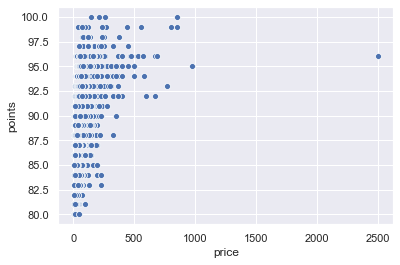

In [19]:
sns.scatterplot(
    x='price',
    y='points',
    data=X_test.join(y_test, how='outer')
)

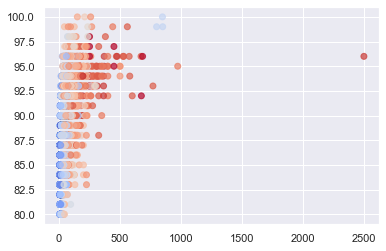

In [20]:
plt.scatter(
    X_test['price'],
    y_test['points'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [21]:
confusion_matrix(y_test, y_pred)


array([[ 13,   5,   7,   5,   9,  16,   8,  17,   1,   5,   2,   2,   2,
          1,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   3,  10,  11,  18,  19,  10,  24,   1,   9,   3,   3,   0,
          0,   0,   0,   0,   0,   0,   0,   0],
       [ 24,  17,  22,  15,  23,  46,  37,  89,   9,  26,   6,  15,   4,
          1,   0,   0,   0,   0,   0,   0,   0],
       [ 46,  20,  40,  29,  55,  80,  74, 138,  14,  35,  11,  15,   1,
          6,   0,   0,   0,   0,   0,   0,   0],
       [108,  35,  76,  50,  94, 177, 153, 289,  30,  68,  22,  32,  13,
         15,   0,   0,   0,   0,   0,   0,   0],
       [125,  38, 109,  84, 114, 230, 214, 475,  31, 130,  27,  72,  10,
         23,   1,   0,   0,   0,   0,   0,   0],
       [135,  23,  96,  94, 124, 244, 276, 646,  69, 156,  59, 119,  34,
         31,   5,   0,   0,   0,   0,   0,   0],
       [142,  19, 144, 133, 144, 248, 312, 935, 117, 253,  97, 171,  64,
         55,   8,   1,   0,   0,   0,   0,   0],
       [ 75,   4, 119,  

In [22]:
knn.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
knn.proba(X_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'proba'

In [ ]:
knn_acc = knn.score(X_train, y_train) * 100
knn_acc

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
linear_model_y = df.pop('price')
print(linear_model_y)
linear_model_x = df
print(linear_model_x.columns)

In [ ]:
print('Points and price predictions:')
print('KNeighborsClassifier score: ', knn_acc)
